 Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import re
import string

In [ ]:
!pip install pandas scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Spam Detection dataset loaded

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spam SMS Detection/Spam_SMS_Detection_Task4.ipynb', encoding='latin-1')  # adjust filename if needed
df = pd.read_csv('/content/drive/MyDrive/Spam SMS Detection/archive (12)/spam.csv', encoding='latin-1')  # adjust filename if needed



In [ ]:
df.head()


,label,message,label_num,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Step 3: Data Preprocessing

In [ ]:
# Keep only necessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Map labels to 0 (ham) and 1 (spam)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for nulls
print(df.isnull().sum())


label        0
message      0
label_num    0
dtype: int64


<ipython-input-60-37674a743e0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


 Step 4: Text Cleaning Function

In [ ]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['clean_message'] = df['message'].apply(clean_text)


<ipython-input-61-d6814a9ee1d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_message'] = df['message'].apply(clean_text)


Step 5: Vectorization

In [ ]:
# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']


Step 6: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Train the Model

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Step 8: Evaluate the Model

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9659192825112107

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



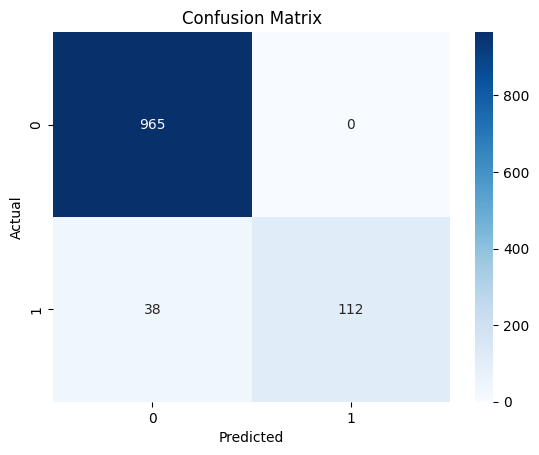

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-76-21e0380619b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


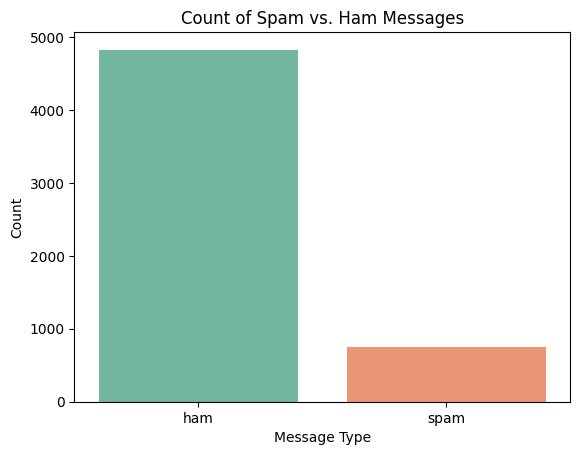

In [ ]:
# Plotting spam vs. ham
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Count of Spam vs. Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

 Predict SMS Spam or Ham(not spam)

In [ ]:
def predict_spam(message):
    message_clean = clean_text(message)
    message_vectorized = vectorizer.transform([message_clean])
    prediction = model.predict(message_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"

predict_spam("Congratulations! You've won a free ticket to Bahamas. Click here!")


'Ham'

In [ ]:
def predict_spam(message):
    message_clean = clean_text(message)
    message_vectorized = vectorizer.transform([message_clean])
    prediction = model.predict(message_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"


predict_spam("WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.")


'Spam'

In [ ]:
def predict_spam(message):
    message_clean = clean_text(message)
    message_vectorized = vectorizer.transform([message_clean])
    prediction = model.predict(message_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"


predict_spam("	The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free ")


'Ham'

In [ ]:
!pip install joblib

import joblib

# Save the trained model
joblib.dump(model, '/content/spam_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, '/content/tfidf_vectorizer.pkl')


['/content/tfidf_vectorizer.pkl']